# Texas COVID-19 data exploration using Pandas (2 of 2)

Primary module objectives:
- Read in processed COVID-19 data using self-defined functions
- Use Pandas to perform basic operations on the data and plot the results

In [19]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib notebook

# update plot defaults:
plt.rcParams.update(
    {"font.size": 14, 
     "figure.figsize": (8,6),
    "lines.linewidth": 3})

In [26]:
# self defined read() functions that streamline what we 
# covered in module-5:
import dshstexas 
tests_fi = "data/Cumulative Tests over Time by County.xlsx"
cases_fi = "data/Texas COVID-19 Case Count Data by County.xlsx"
deaths_fi = "data/Texas COVID-19 Fatality Count Data by County.xlsx"
cdf = dshstexas.read_cases(cases_fi)
tdf = dshstexas.read_testing(tests_fi)
ddf = dshstexas.read_deaths(deaths_fi)

# Texas county populations:
population = pd.read_excel("data/texas_county_populations.xlsx", index_col=[0])

# Testing
Let's take a look at the top 5 counties so far in COVID-19 testing.

<IPython.core.display.Javascript object>


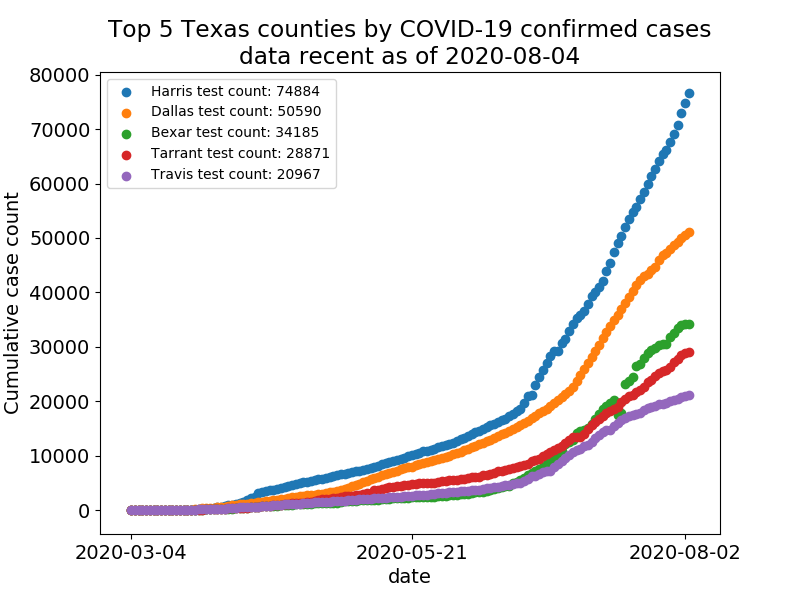

([<matplotlib.axis.XTick at 0x7f3f8fc44a90>,
 <a list of 3 Text xticklabel objects>)

In [64]:
# Let's take a look at county testing:
cdf = cdf.sort_values(by="2020-08-02", ascending=False)
plt.figure()
plt.title("Top 5 Texas counties by COVID-19 confirmed cases\ndata recent as of 2020-08-04")
for county in cdf.index[:5]:
    label="%s test count: %d" %(county, cdf.loc[county, "2020-08-02"])
    plt.scatter(cdf.columns, cdf.loc[county, :], label=label)
plt.legend(fontsize=10)
plt.xlabel("date")
plt.ylabel("Cumulative case count")
plt.xticks([cdf.columns[0], cdf.columns[75], "2020-08-02"])

These numbers are fascinating, but more useful for comparison would be a comparison of test count normalized by county population.

<IPython.core.display.Javascript object>


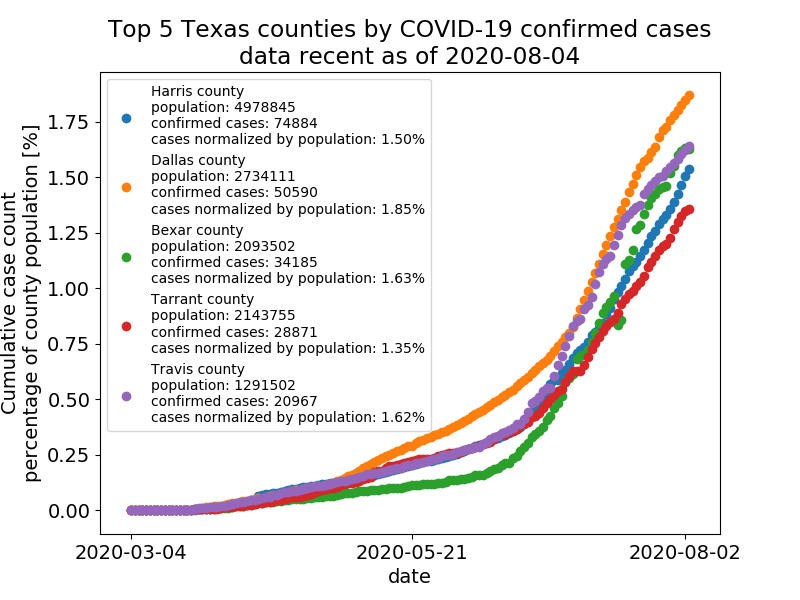

([<matplotlib.axis.XTick at 0x7f3f8fd72110>,
 <a list of 3 Text xticklabel objects>)

In [62]:
county_names = population.index
norm_cdf = cdf.copy()
for county in county_names:
    norm_cdf.loc[county, :] /= population.loc[county, "population"]
norm_cdf = norm_cdf.sort_values(by="2020-08-02", ascending=False)

# major metropolitan areas:
counties_of_interest = [
    "Harris",
    "Dallas",
    "Bexar",
    "Tarrant",
    "Travis"]

# plot:
plt.figure()
plt.title("Top 5 Texas counties by COVID-19 confirmed cases\ndata recent as of 2020-08-04")
for county in counties_of_interest:
    label="""%s county
population: %d
confirmed cases: %d
cases normalized by population: %.2f%%""" %(
        county,
        population.loc[county, "population"],
        cdf.loc[county, "2020-08-02"],
        norm_cdf.loc[county, "2020-08-02"]*100)
    plt.scatter(norm_cdf.columns, norm_cdf.loc[county, :]*100, label=label)
plt.legend(fontsize=10)
plt.xlabel("date")
plt.ylabel("Cumulative case count\npercentage of county population [%]")
plt.xticks([cdf.columns[0], cdf.columns[75], "2020-08-02"])

# Harris county cases per day


<IPython.core.display.Javascript object>


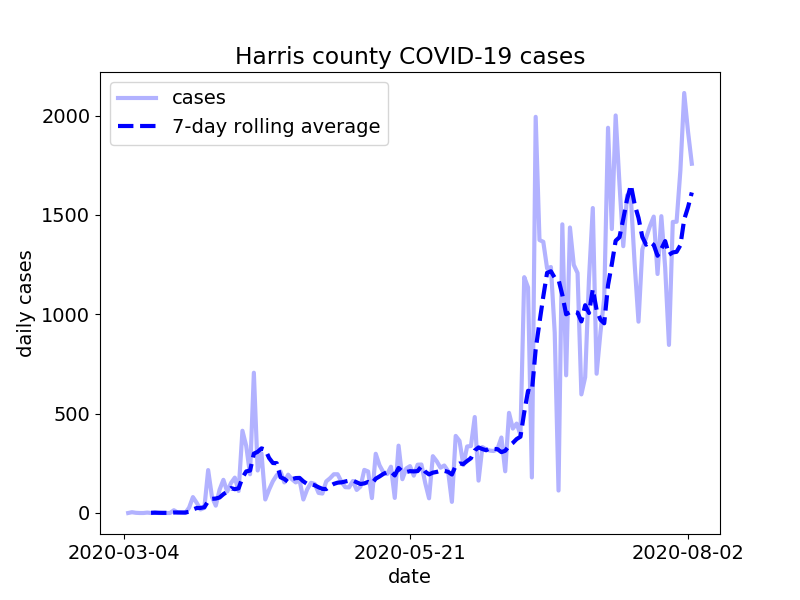

Text(0, 0.5, 'daily cases')

In [74]:
# First, get cases and deaths by day instead of cumulative values:
cases_per_day = cdf.diff(axis=1)

# get rolling weekly averages:
cases_per_day_ra = cases_per_day.rolling(7, axis=1).mean()

# cases per day:
plt.figure()
plt.title("Harris county COVID-19 cases")
plt.plot(cases_per_day.columns, cases_per_day.loc["Harris", :], alpha=0.3, color="blue", label="cases")
plt.plot(cases_per_day_ra.columns, cases_per_day_ra.loc["Harris", :], linestyle="--",color="blue", label="7-day rolling average")
plt.xticks([cdf.columns[0], cdf.columns[75], "2020-08-02"])
plt.legend()
plt.xlabel("date")
plt.ylabel("daily cases")

# Harris County deaths per day

<IPython.core.display.Javascript object>


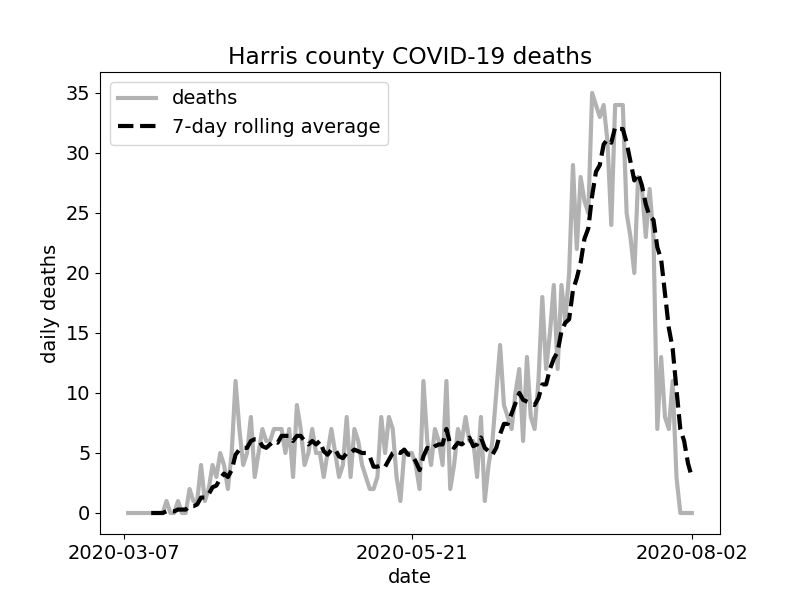

Text(0, 0.5, 'daily deaths')

In [81]:
deaths_per_day = ddf.diff(axis=1)
deaths_per_day_ra = deaths_per_day.rolling(7, axis=1).mean()

# cases per day:
plt.figure()
plt.title("Harris county COVID-19 deaths")
plt.plot(deaths_per_day.columns, deaths_per_day.loc["Harris", :], alpha=0.3, color="black", label="deaths")
plt.plot(deaths_per_day_ra.columns, deaths_per_day_ra.loc["Harris", :], linestyle="--",color="black", label="7-day rolling average")
plt.xticks([ddf.columns[0], ddf.columns[75], "2020-08-02"])
plt.legend()
plt.xlabel("date")
plt.ylabel("daily deaths")

In [79]:
deaths_per_day.loc["Harris", "2020-07-16"]

25.0

In [80]:
cases_per_day.loc["Harris", "2020-07-14"]

2001.0